# Исследование объявлений о продаже квартир

## Описание признакового пространства

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition| сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total| всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv('24.06.24+продажа_квартир.csv',
                 sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# пропуски данных в процентном соотношении
df.isnull().sum ()/len(df)*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [8]:
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles=per)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
1%,0.000000,1.000000e+06,25.199000,1.000000,2.500000,2.000000,13.000000,1.000000,5.000000,0.000000,9412.560000,1326.580000,0.000000,24.000000,0.000000,35.090000,4.000000
5%,1.000000,1.870000e+06,31.000000,1.000000,2.500000,4.000000,15.200000,1.000000,5.500000,0.000000,11557.400000,3541.000000,0.000000,95.900000,0.000000,93.000000,9.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
95%,20.000000,1.530000e+07,116.000000,4.000000,3.300000,25.000000,69.000000,16.000000,20.000000,2.000000,51340.000000,31671.600000,2.000000,968.000000,3.000000,976.550000,647.000000


|Признак|Коментарии|
|:---:|:---:|
|total_images   |           значения присутствуют все 
last_price      |          +
total_area      |       +
first_day_exposition |    перевести в тип даты(?)
rooms                |   19 комнат максимум - аномальное значение (комуналка в Питере/общежитие)
ceiling_height       |  38% отсутствуют данные (возможно стандартный размер для новостроек?), аномальные минимальные и максимальные значения (максимальные значение данного показателя может 9, а минимальное - 2,5)
floors_total         |    0.36% отсутствующих данных (незначительно), 60 этажей - аномально(?)
living_area          |    8.02% отсутсвующих данных
floor                |   +
is_apartment         |  88.29% отсутвующих данные (можно предположить, что там где нет значений это не апартаменты)/ перевести в bool 
studio               |   +
open_plan            |   +
kitchen_area         |   9.61% данных нет
balcony              |  48.60% данных нет (~может где балкон отсутствует, там вместо 0 стоит NaN~, возможно балкона нет, может эти квартиры на 1 этаже)
locality_name        |   0.206% данных нет
airports_nearest     |  23.384% данных нет (скорее всего аэропорта рядом нет)
cityCenters_nearest  |  23.287% данных нет (скорее всего рядом нет)
parks_around3000     |  23.283% данных нет (скорее всего рядом нет)
parks_nearest        |  65.909% данных нет (скорее всего рядом нет)
ponds_around3000     |  23.283% данных нет (скорее всего рядом нет)
ponds_nearest        |  61.559% данных нет (скорее всего рядом нет)
days_exposition      |  13.422% данных нет 

In [10]:
print(df['is_apartment'].unique())

[nan False True]


In [11]:
print(df['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


In [12]:
df[df['balcony'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теория о том, что отсутствуют данные у квартир на 1-х этажах не подтвердилась. Но все равно можно предположить, что балконы отсутствуют. Поэтому заполним пропуски в столбце балконы на 0 - отсутствие балкона.

In [14]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


In [15]:
print(df['floors_total'].unique())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


In [16]:
# предположим если нет данных об этажности, то этаж один - собственный дом.
df['floors_total'] = df['floors_total'].fillna(1)
print('Количество NaN в столбце floors_total:', df['floors_total'].isnull().sum())

Количество NaN в столбце floors_total: 0


In [17]:
new_df = df[['total_area', 'kitchen_area', 'living_area', 'studio']].copy()
new_df

,total_area,kitchen_area,living_area,studio
0,108.00,25.00,51.0,False
1,40.40,11.00,18.6,False
2,56.00,8.30,34.3,False
3,159.00,NaN,NaN,False
4,100.00,41.00,32.0,False
...,...,...,...,...
23694,133.81,13.83,73.3,False
23695,59.00,8.50,38.0,False
23696,56.70,NaN,29.7,False
23697,76.75,23.30,NaN,False


In [18]:
print(df['studio'].unique())

[False  True]


In [19]:
new_df[new_df['kitchen_area'].isnull()]

,total_area,kitchen_area,living_area,studio
3,159.0,NaN,NaN,False
30,32.8,NaN,NaN,False
37,45.8,NaN,NaN,False
44,40.0,NaN,NaN,False
59,46.5,NaN,NaN,False
...,...,...,...,...
23655,40.5,NaN,19.6,False
23663,88.0,NaN,NaN,False
23670,45.6,NaN,NaN,False
23679,35.0,NaN,NaN,False


Поскольку в каких-то строках есть общая площадь и площадь кухни, то посчитаем число жилой части

In [21]:
 df.loc[(df['total_area'] > 0) & (df['living_area'] > 0), 'kitchen_area'] = (df['total_area'] - df['living_area'])

Также заполним пропуски в строках со студией, оставив для кухни значение 5 (поскольку это минимальное значение для кухни), а для жилой части оставшиеся.

In [23]:
 df.loc[(df['studio'] == True) & (df['total_area'] > 0), 'kitchen_area'] = 5

In [24]:
 df.loc[(df['studio'] == True) & (df['total_area'] > 0), 'living_area'] = df['total_area'] - (df['kitchen_area'])

In [25]:
df.loc[(df['kitchen_area'] > 0) & (df['living_area'] > 0), 'total_area'] = (df['kitchen_area'] + df['living_area'])

In [26]:
df['kitchen_area'].isnull().sum()

1454

Было 2278 стало 1454.

In [28]:
df['living_area'].isnull().sum()

1893

Было 1903 пропусков, уменьшили незначительно, во всех остальных случаях площадь не заполнили

In [30]:
# заменим пропуски в населенном пункте на значение "населенный пункт не указан"
df['locality_name'] = df['locality_name'].fillna('населенный пункт не указан')

In [31]:
df['locality_name'].isnull().sum()

0

In [32]:
df = df.astype({'first_day_exposition': 'datetime64[ns]',
                'is_apartment': 'bool',
               'floors_total': 'int64',
               'balcony': 'int64'},
               errors='ignore')
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [33]:
# для читабельности уберем в цене нули и приведем цену к тыс.рублей.
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0)

In [34]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,57.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,21.8,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,21.7,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,68.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [35]:
# исправляем высоту потолков, по стандарту потолки не должны ,быть ниже 2,5 и в Питере бывают потолки 9 метров в жилых домах
df.loc[df.ceiling_height < 2.5, 'ceiling_height'] = 2.5
df.loc[df.ceiling_height > 9, 'ceiling_height'] = 9

In [36]:
# разделим на непрерывные и дискретные
lst_cont = ['total_images', 'last_price', 'total_area',
            'ceiling_height', 'living_area', 'kitchen_area',
            'airports_nearest', 'cityCenters_nearest',
            'parks_around3000', 'parks_nearest', 'ponds_around3000',
            'ponds_nearest', 'days_exposition',
            'rooms', 'floors_total', 'floor', 'balcony']

lst_disc = ['is_apartment', 'studio', 'open_plan', 'locality_name']


In [37]:
for col in lst_disc:
    print(f'Признак -- {col} --')
    print(df[col].value_counts())
    print()

Признак -- is_apartment --
is_apartment
True     20974
False     2725
Name: count, dtype: int64

Признак -- studio --
studio
False    23550
True       149
Name: count, dtype: int64

Признак -- open_plan --
open_plan
False    23632
True        67
Name: count, dtype: int64

Признак -- locality_name --
locality_name
Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: count, Length: 365, dtype: int64



In [38]:
print(f'Количество дублирующихся записей - {df.duplicated().sum()}.')

Количество дублирующихся записей - 0.


In [39]:
df[lst_disc].describe(include='all')

,is_apartment,studio,open_plan,locality_name
count,23699,23699,23699,23699
unique,2,2,2,365
top,True,False,False,Санкт-Петербург
freq,20974,23550,23632,15721


In [40]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

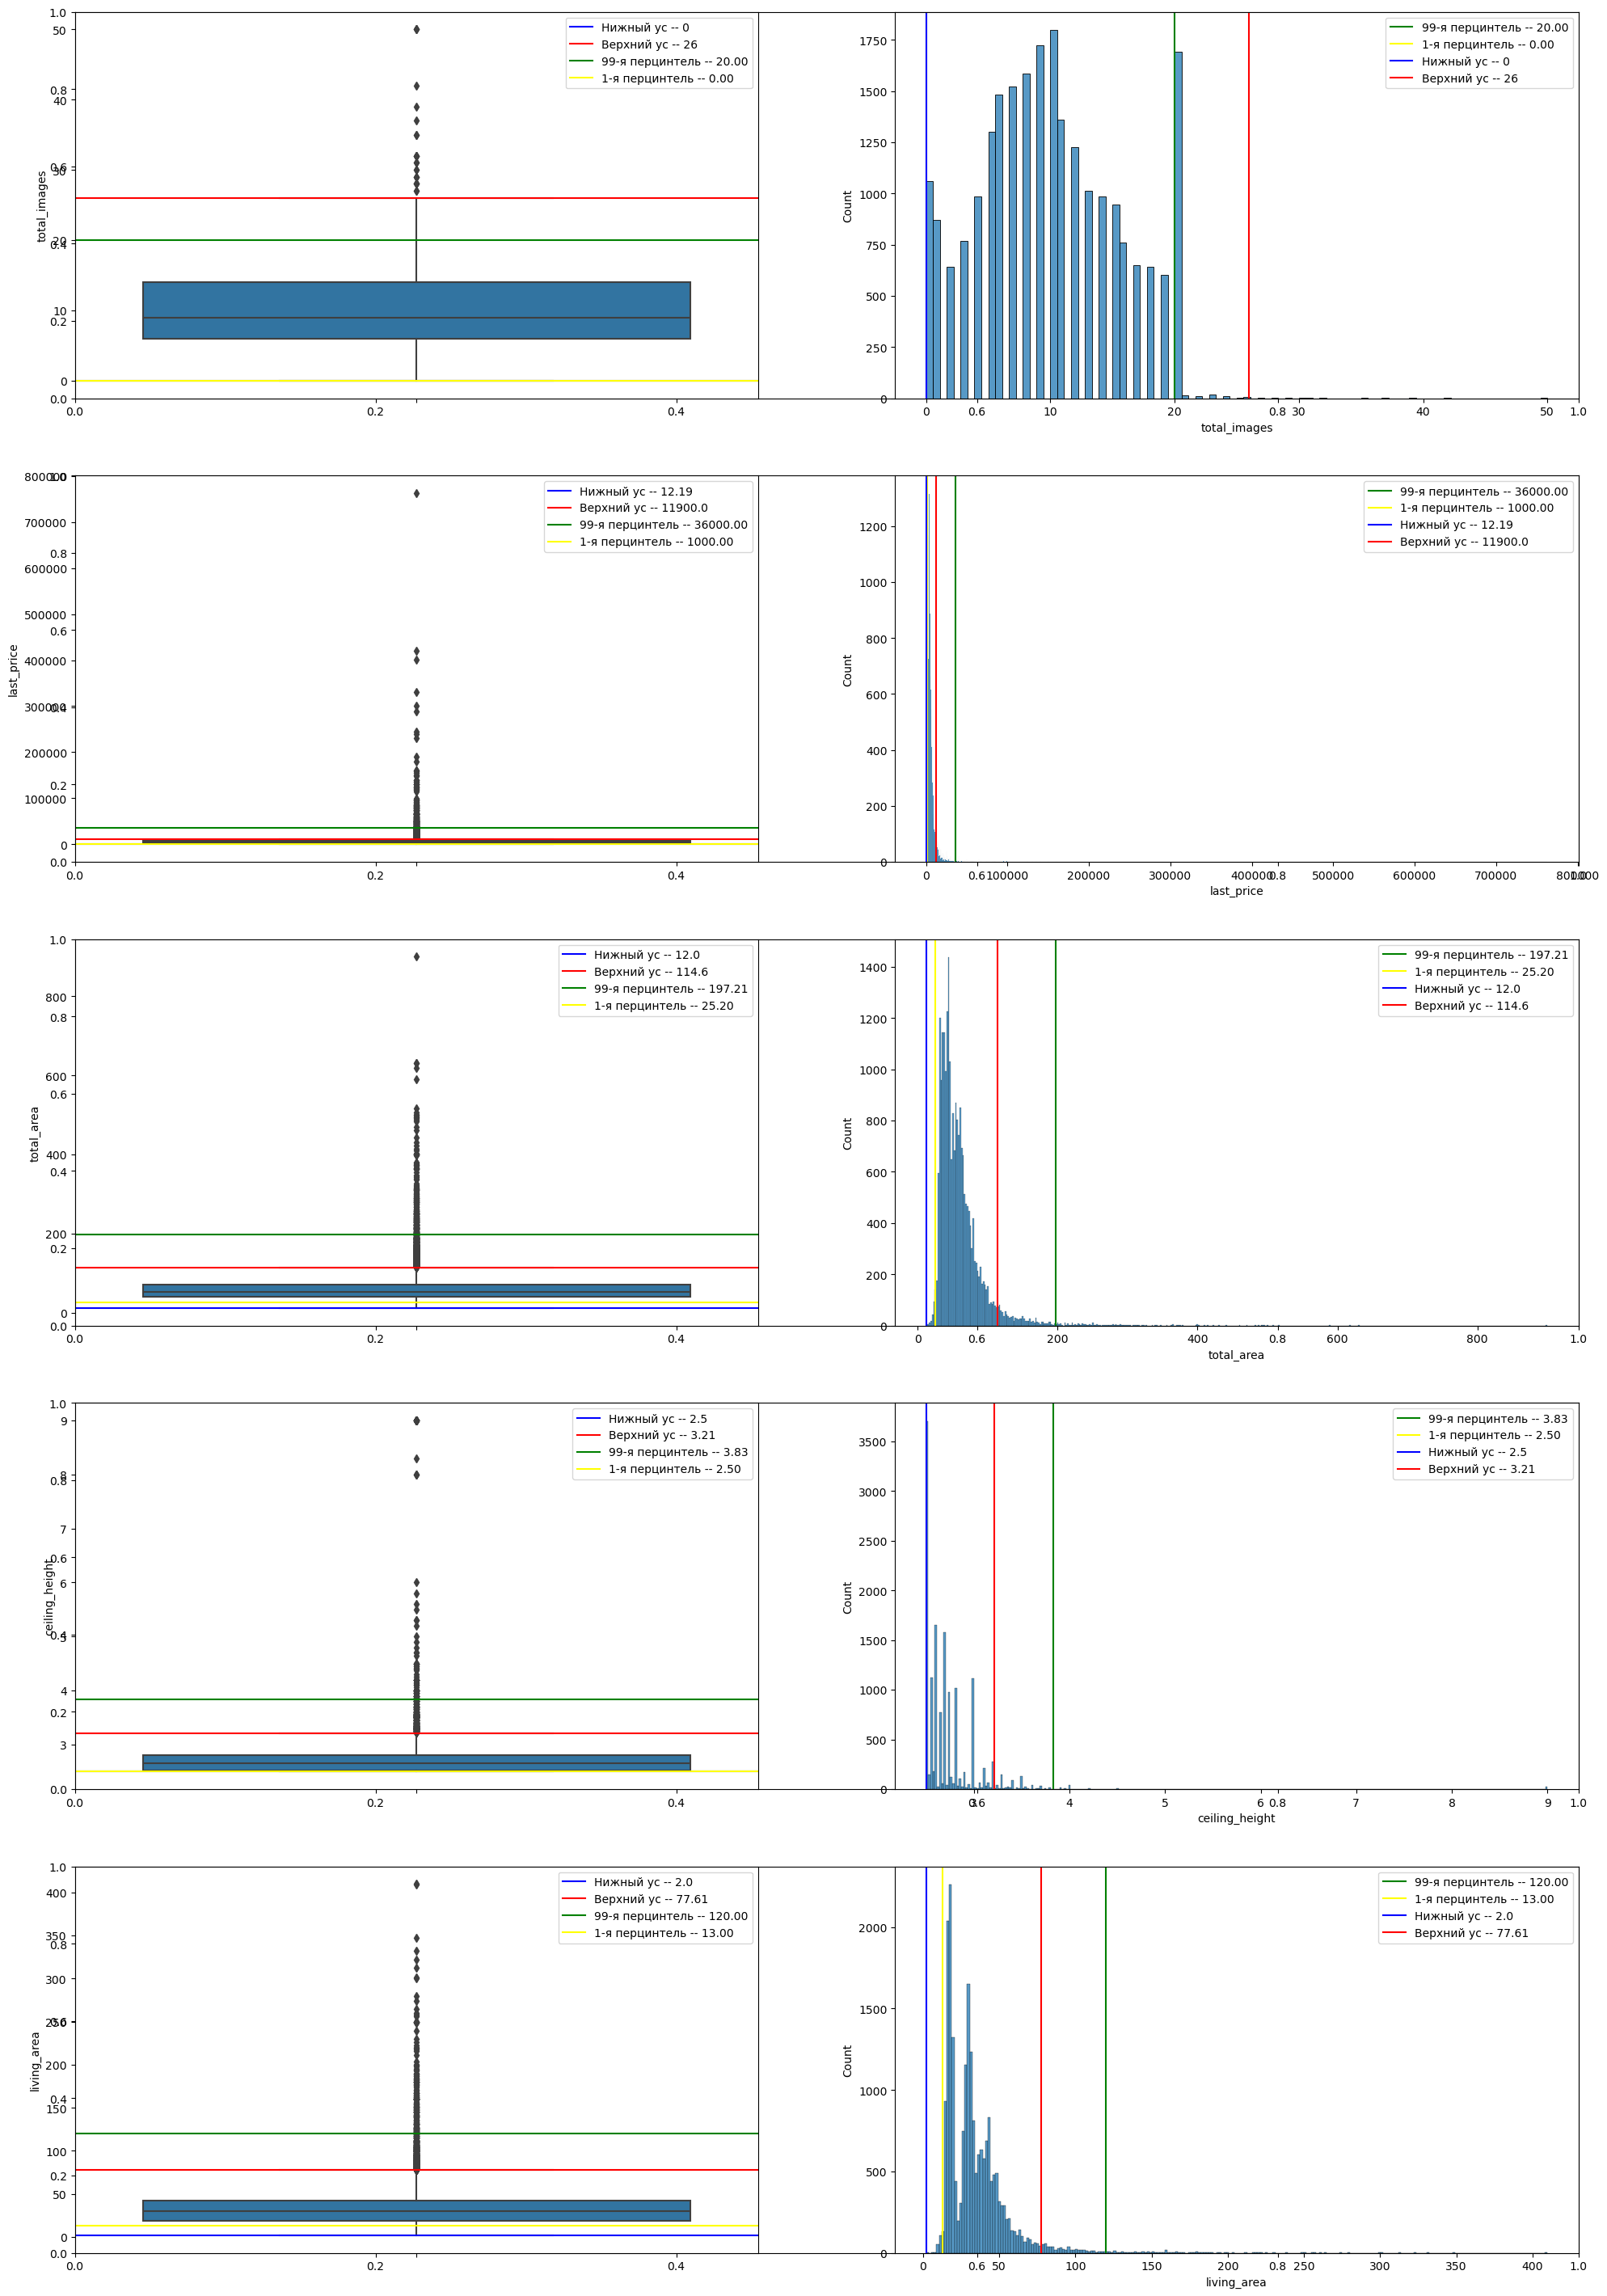

In [41]:
plt.subplots(5, figsize=(24, 36))
for index_fig, col in enumerate(lst_cont[:5], start=0):
    plt.subplot(5, 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                 y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    plt.legend()
    plt.subplot(5, 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')

    plt.legend()

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

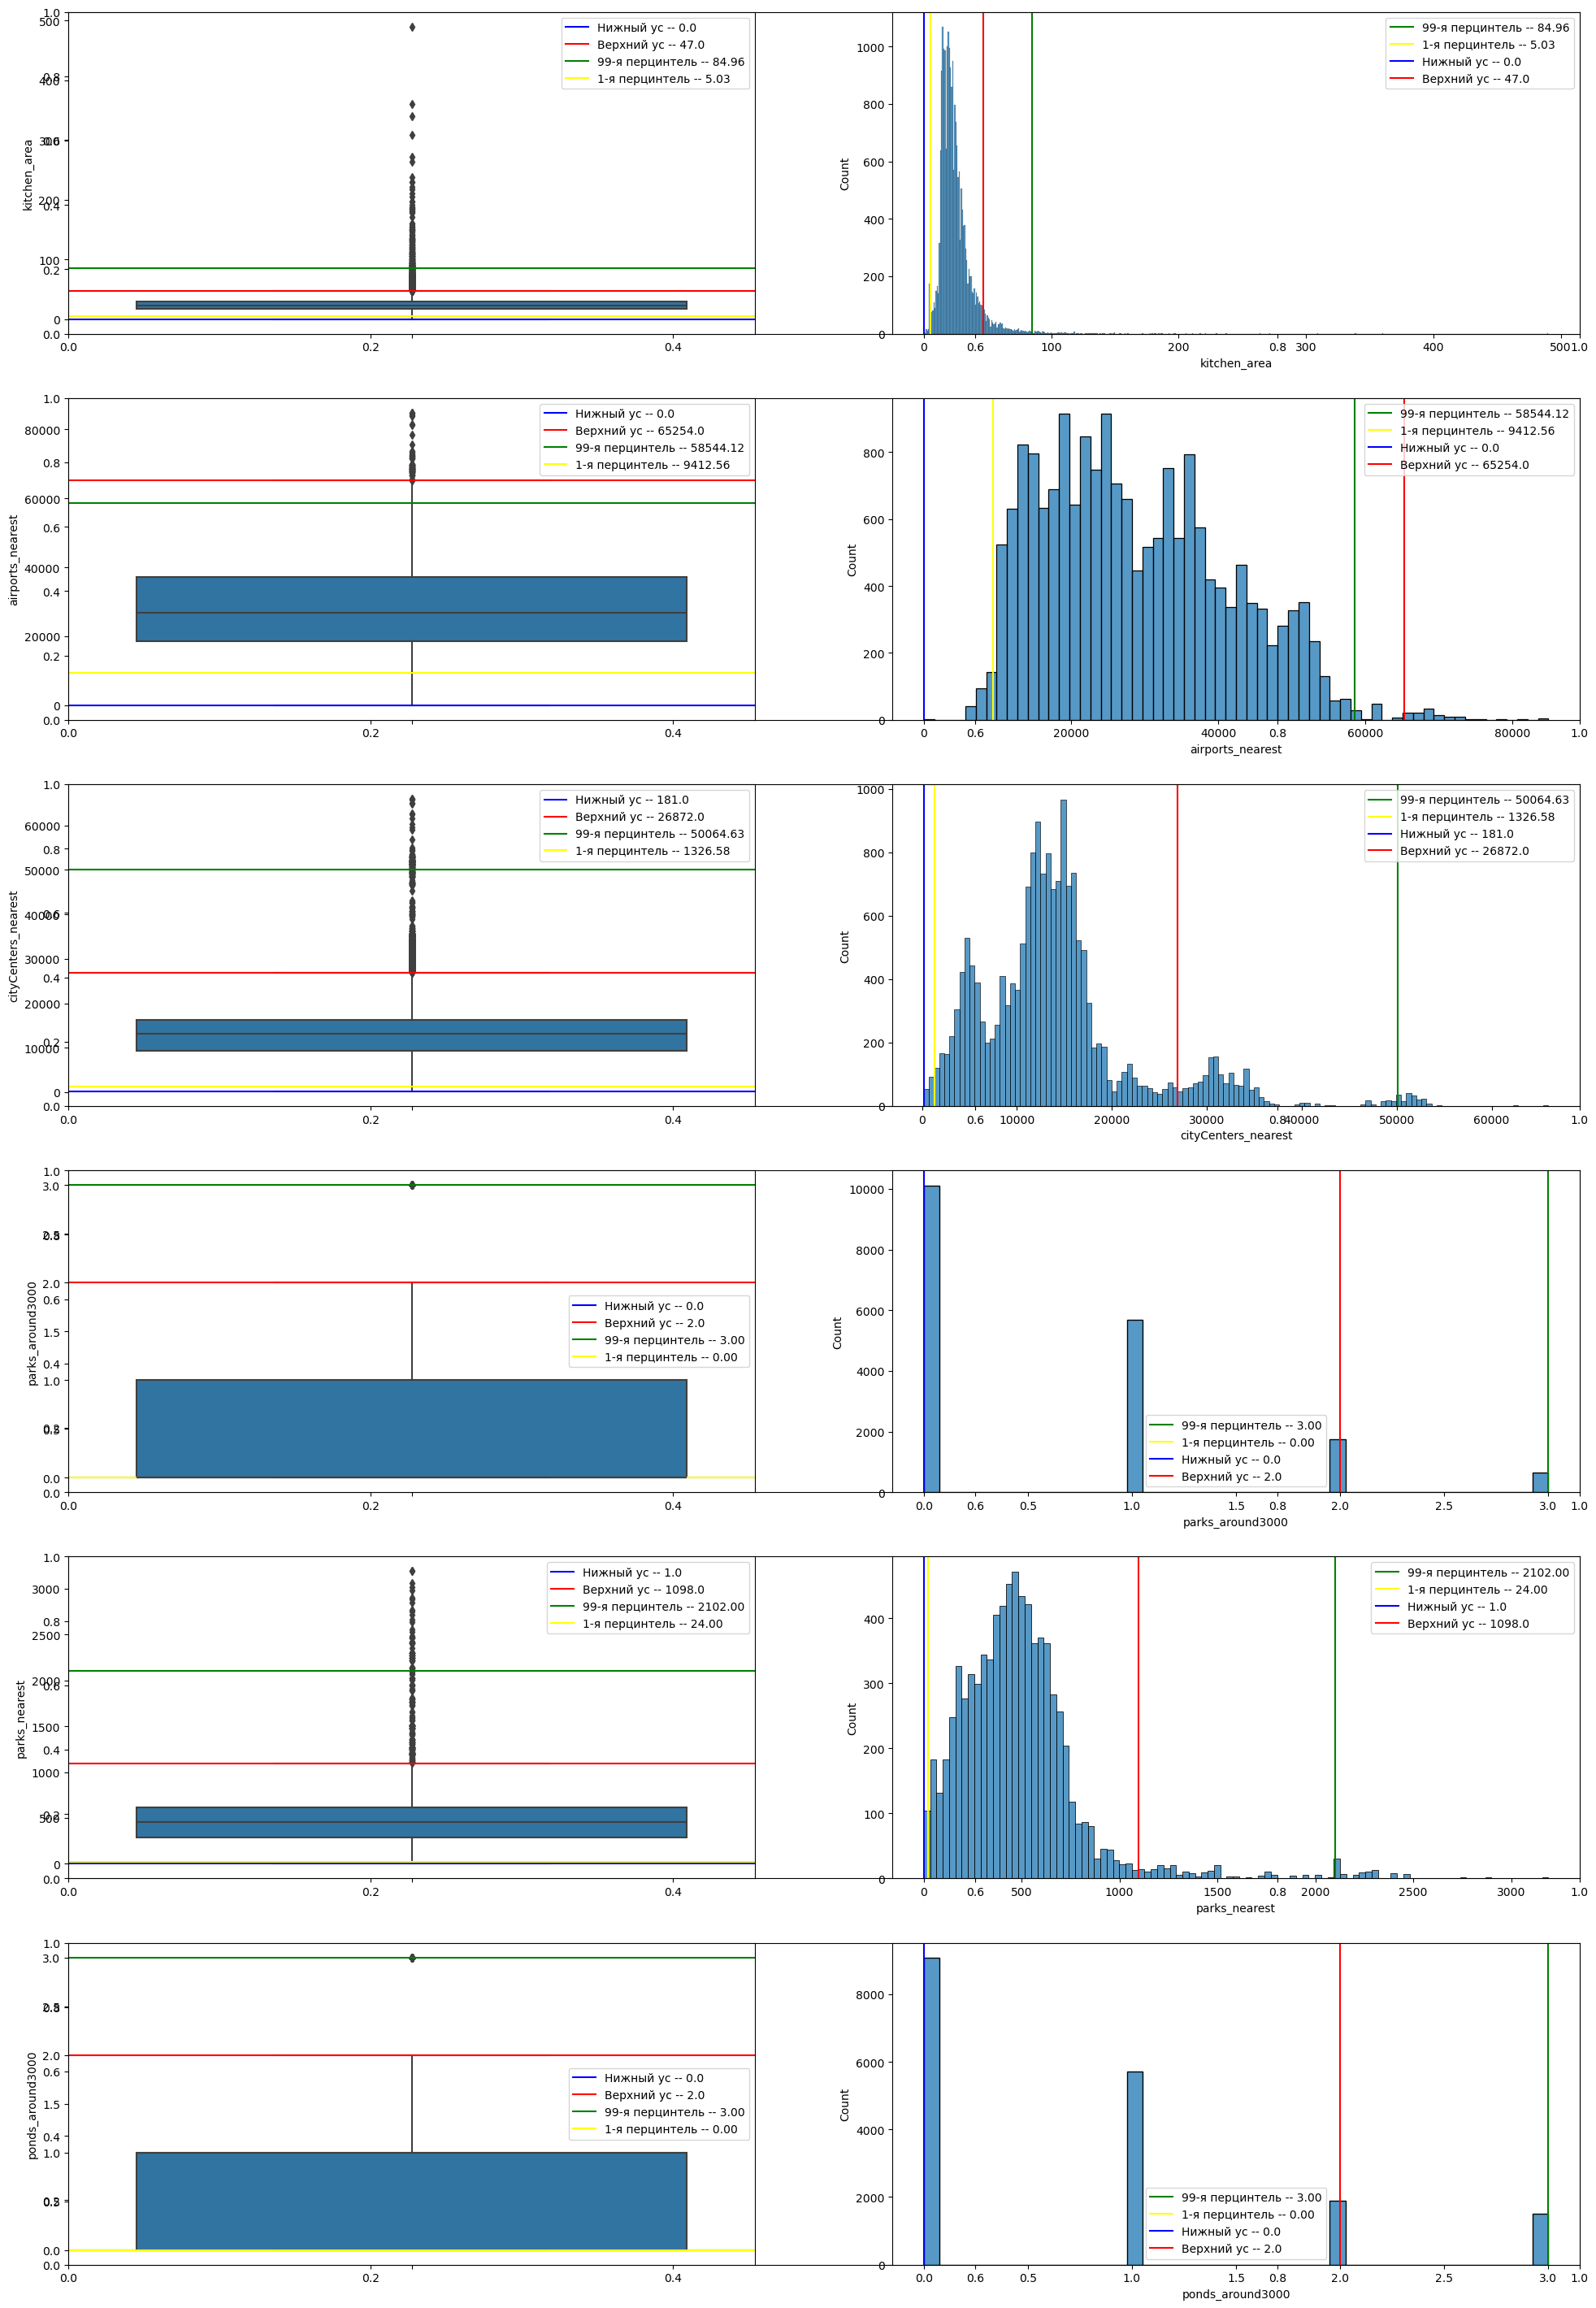

In [42]:
# поиск аномальных значений для непрерывных признаков: с 5 по 10 признаки

plt.subplots(6, figsize=(24, 36))
for index_fig, col in enumerate(lst_cont[5:11], start=0):
    plt.subplot(6, 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                 y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    plt.legend()
    plt.subplot(6, 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')

    plt.legend()

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

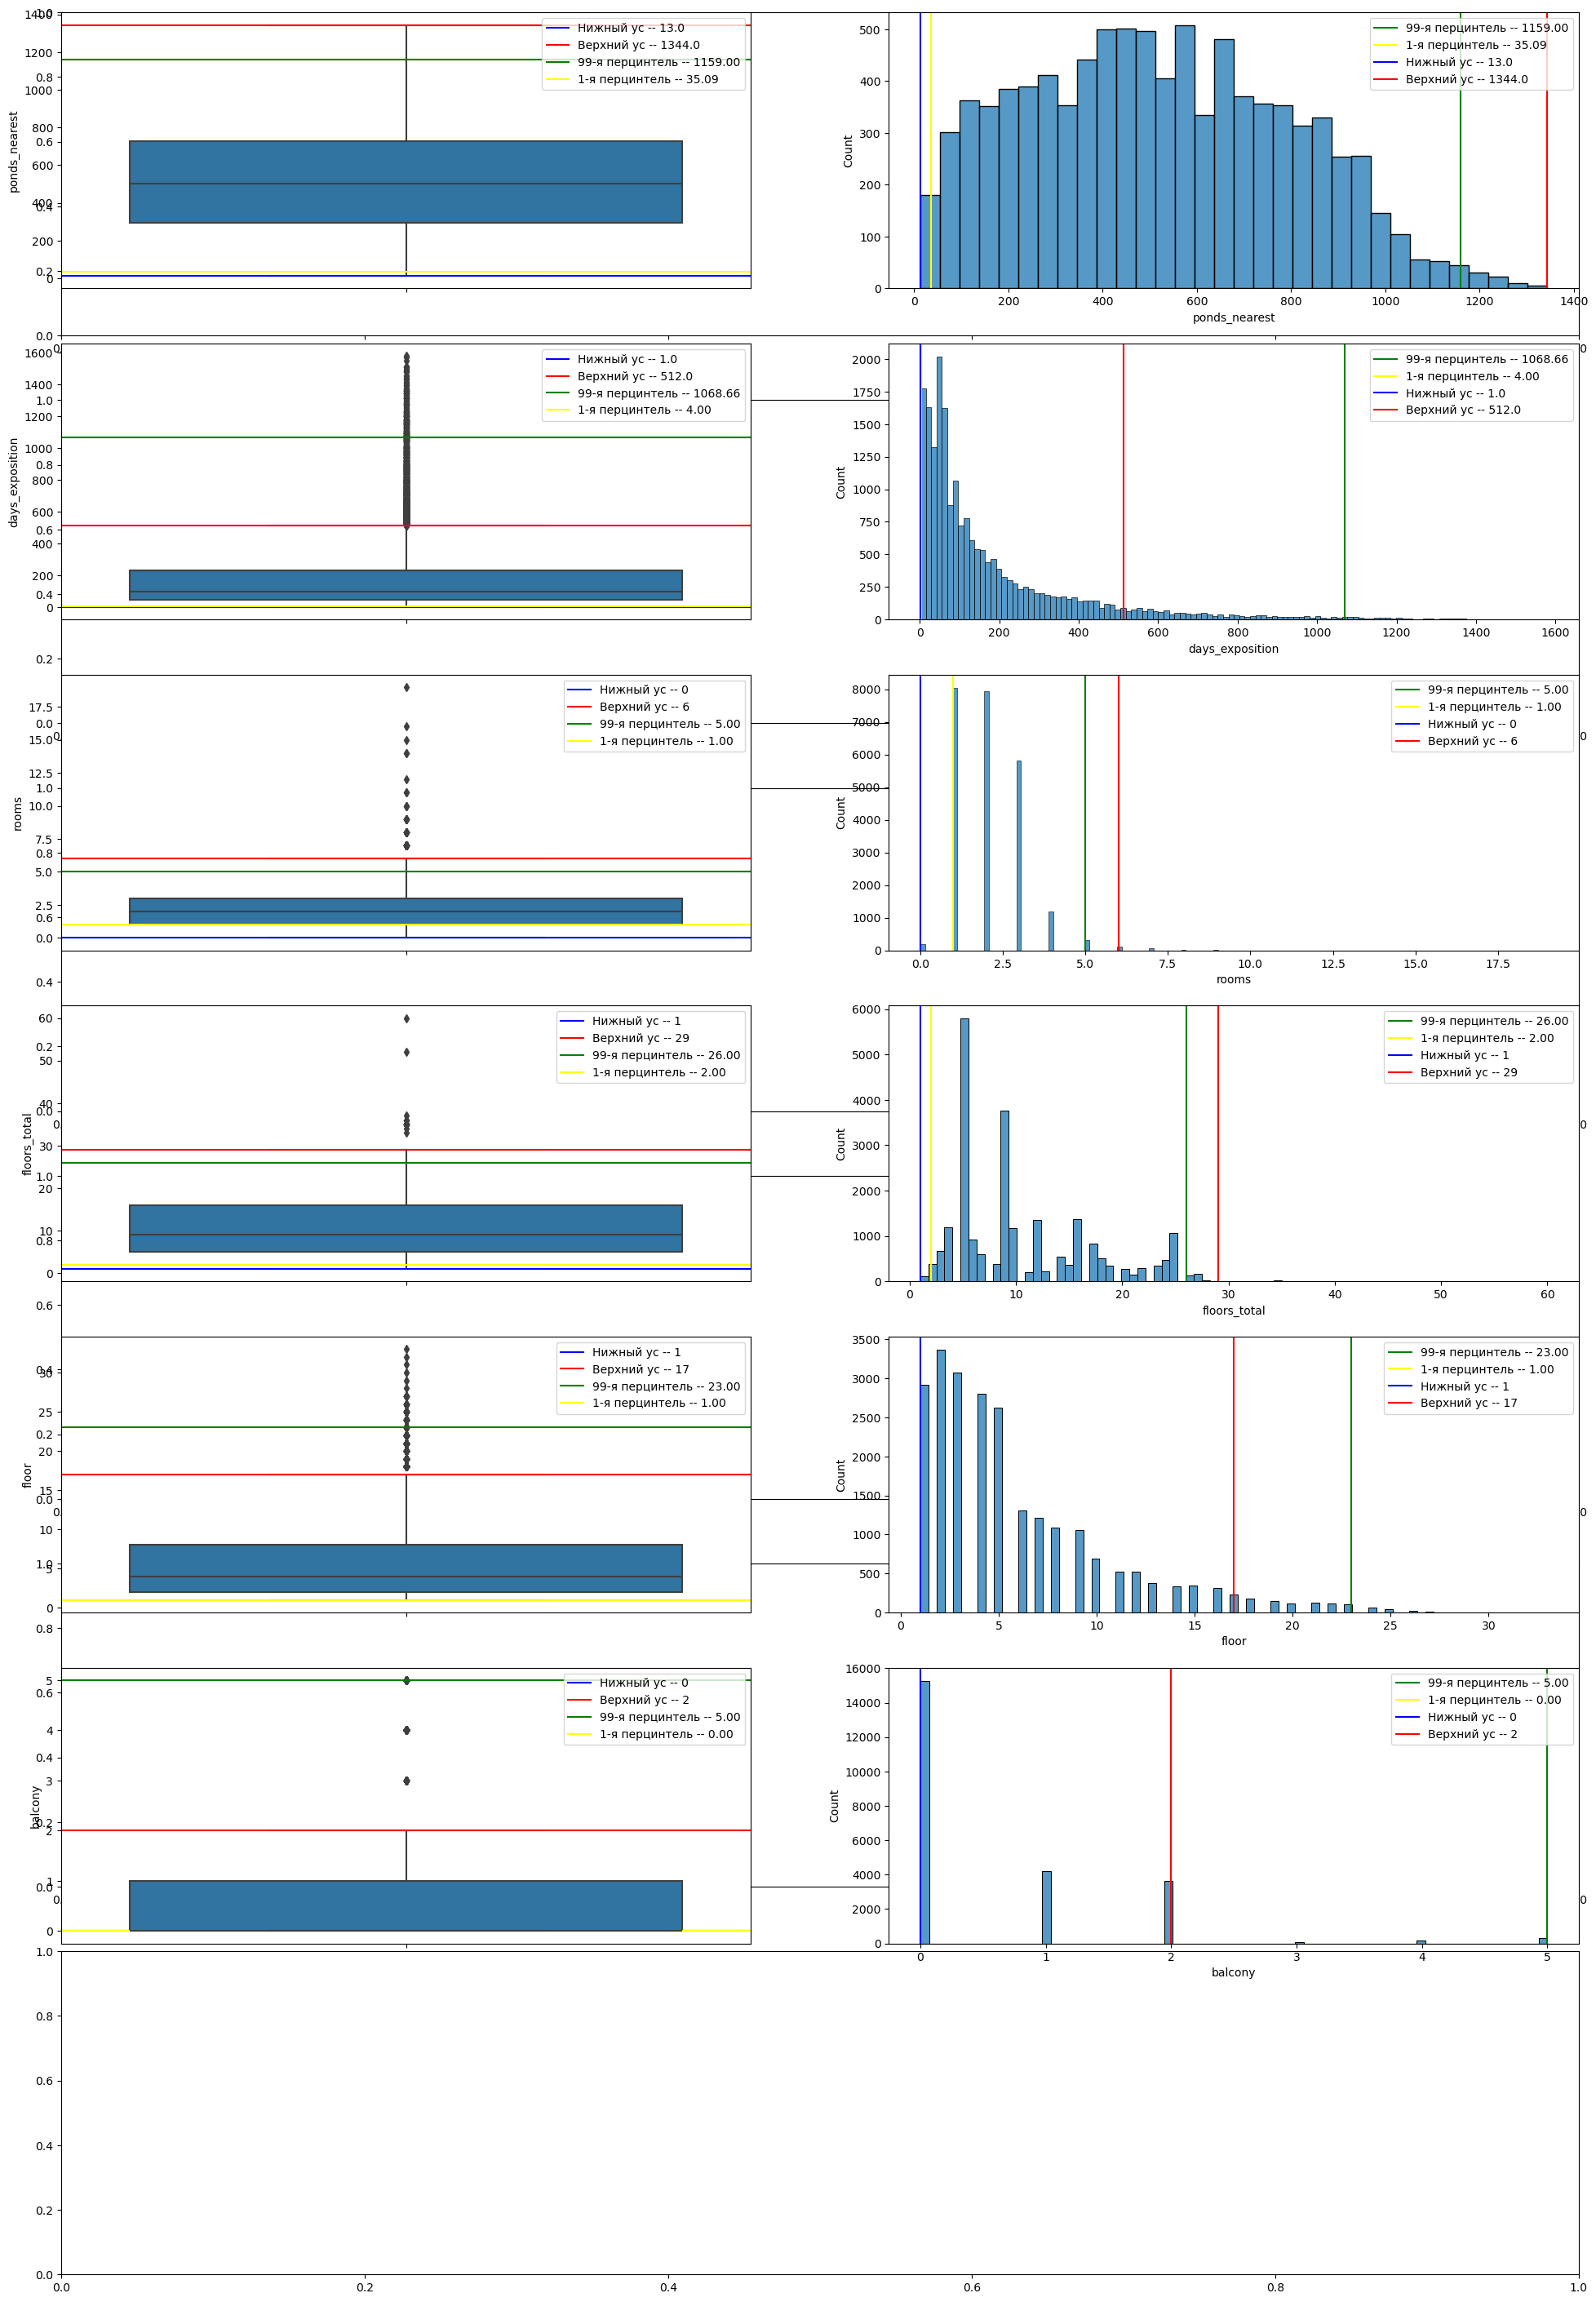

In [43]:
# поиск аномальных значений для непрерывных признаков: с 11 по .. признаки

plt.subplots(6, figsize=(24, 36))
for index_fig, col in enumerate(lst_cont[11:], start=0):
    plt.subplot(7, 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                 y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    plt.legend()
    plt.subplot(7, 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')

    plt.legend()

Удалим в столбце цены показатели ниже значения 1 перцинтеля. Поскольку 12 тысяч за квартиру неправдоподобно, 1% данных потерять можно

In [45]:
df = df[df.last_price >= 1000]

Посчитаем стоимость за 1 квадратный метр.

In [47]:
df['price_m2'] = np.round(df['last_price']/df['total_area'], 3)
df['price_m2']

0        120.370
1         82.921
2         92.786
3        408.176
4        100.000
          ...   
23694     72.491
23695     52.542
23696     44.092
23697    149.511
23698     41.796
Name: price_m2, Length: 23474, dtype: float64

Теперь разделим дату на день, месяц, год.

In [49]:
df['year'] = df['first_day_exposition'].dt.year

df['number_month'] = df['first_day_exposition'].dt.month

df['name_month'] = df['first_day_exposition'].dt.month_name()

df['day'] = df['first_day_exposition'].dt.weekday

df['day_name'] = df['first_day_exposition'].dt.day_name()

df[['first_day_exposition', 'number_month', 'name_month', 'day', 'day_name']]

,first_day_exposition,number_month,name_month,day,day_name
0,2019-03-07,3,March,3,Thursday
1,2018-12-04,12,December,1,Tuesday
2,2015-08-20,8,August,3,Thursday
3,2015-07-24,7,July,4,Friday
4,2018-06-19,6,June,1,Tuesday
...,...,...,...,...,...
23694,2017-03-21,3,March,1,Tuesday
23695,2018-01-15,1,January,0,Monday
23696,2018-02-11,2,February,6,Sunday
23697,2017-03-28,3,March,1,Tuesday


In [50]:
df.groupby(['year', 'number_month', 'name_month']).first_day_exposition.count()

year  number_month  name_month
2014  11            November        20
      12            December       117
2015  1             January         70
      2             February        62
      3             March          112
      4             April           50
      5             May             64
      6             June            95
      7             July            91
      8             August          93
      9             September       92
      10            October        147
      11            November       155
      12            December       154
2016  1             January        121
      2             February       254
      3             March          344
      4             April          416
      5             May            432
      6             June           460
      7             July           139
      8             August          87
      9             September      124
      10            October        123
      11            November     

Добавим колонку с этажами: первый, последний, другой.

In [52]:
df['level'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['level'] = np.where(df['floor'] == df['floors_total'], 'последний', df['level'])

In [53]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,year,number_month,name_month,day,day_name,level
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,NaN,120.370,2019,3,March,3,Thursday,другой
1,7,3350.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,0.0,NaN,81.0,82.921,2018,12,December,1,Tuesday,первый
2,10,5196.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,2.0,574.0,558.0,92.786,2015,8,August,3,Thursday,другой
3,0,64900.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,3.0,234.0,424.0,408.176,2015,7,July,4,Friday,другой
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100.000,2018,6,June,1,Tuesday,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,3.0,381.0,NaN,72.491,2017,3,March,1,Tuesday,другой
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,45.0,52.542,2018,1,January,0,Monday,другой
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,44.092,2018,2,February,6,Sunday,первый
23697,13,11475.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,3.0,196.0,602.0,149.511,2017,3,March,1,Tuesday,другой


Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [55]:
df['living_area_part'] = np.round(df['living_area']/df['total_area'], 3)
df['kitchen_area_part'] = np.round(df['kitchen_area']/df['total_area'], 3)

In [56]:
df[['living_area_part', 'kitchen_area_part']]

,living_area_part,kitchen_area_part
0,0.472,0.528
1,0.460,0.540
2,0.612,0.388
3,NaN,NaN
4,0.320,0.680
...,...,...
23694,0.548,0.452
23695,0.644,0.356
23696,0.524,0.476
23697,NaN,0.304


Рассмотрим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [58]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23474.000000,23474.000000,23474.000000,14416.000000
mean,60.526128,6596.886837,2.074380,2.740565
std,35.759286,10924.302327,1.080655,0.390949
min,12.000000,1000.000000,0.000000,2.500000
25%,40.000000,3470.000000,1.000000,2.520000
50%,52.000000,4650.129500,2.000000,2.650000
75%,70.000000,6800.000000,3.000000,2.800000
max,900.000000,763000.000000,19.000000,9.000000


D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


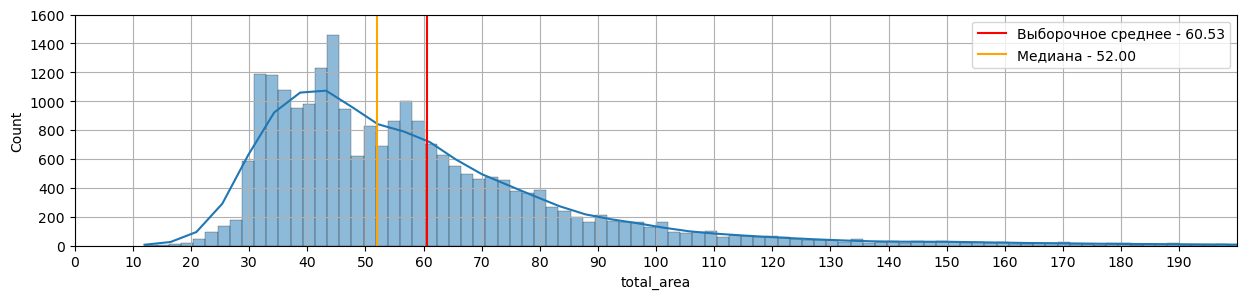

In [59]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.histplot(df.total_area, kde=True)
plt.grid()

plt.xlim(0, 200)
plt.ylim(0, 1600)

plt.xticks(range(0, 200, 10))

ax.axvline(df.total_area.mean(), color='red', label=f'Выборочное среднее - {df.total_area.mean():.2f}')
ax.axvline(df.total_area.median(), color='orange', label=f'Медиана - {df.total_area.median():.2f}')

plt.legend()

Больше всего квартир с площалью от 30 до 60 кв2 метров. Вся выборка колеблится от 12 до 900 м2. Но квартиры свыше 160 м2 являются очень редкими, поэтому на графике мы убрали значения свыше 200 м2.

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


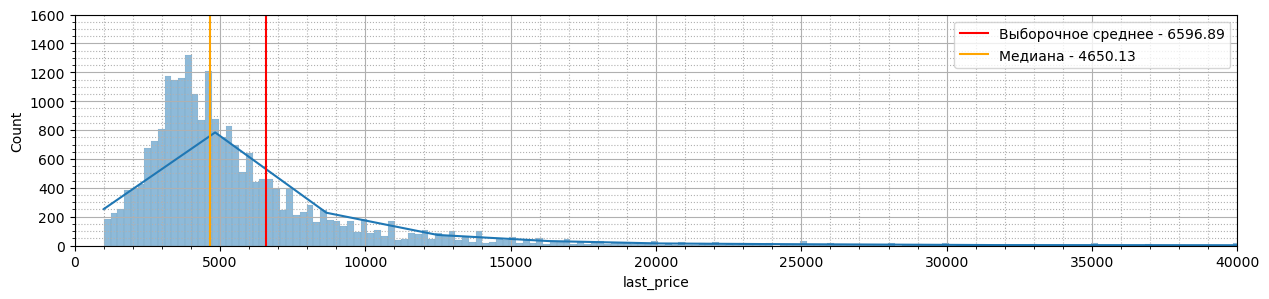

In [61]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.histplot(df.last_price, kde=True)

plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')

plt.xlim(0, 40_000)
plt.ylim(0, 1600)

ax.axvline(df.last_price.mean(), color='red', label=f'Выборочное среднее - {df.last_price.mean():.2f}')
ax.axvline(df.last_price.median(), color='orange', label=f'Медиана - {df.last_price.median():.2f}')

plt.legend()


При покупке жилья в г.Санкт-Петербург и Ленинградской области для описания средней цены лучше использовать медиану - 4,650 млн.рублей.

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


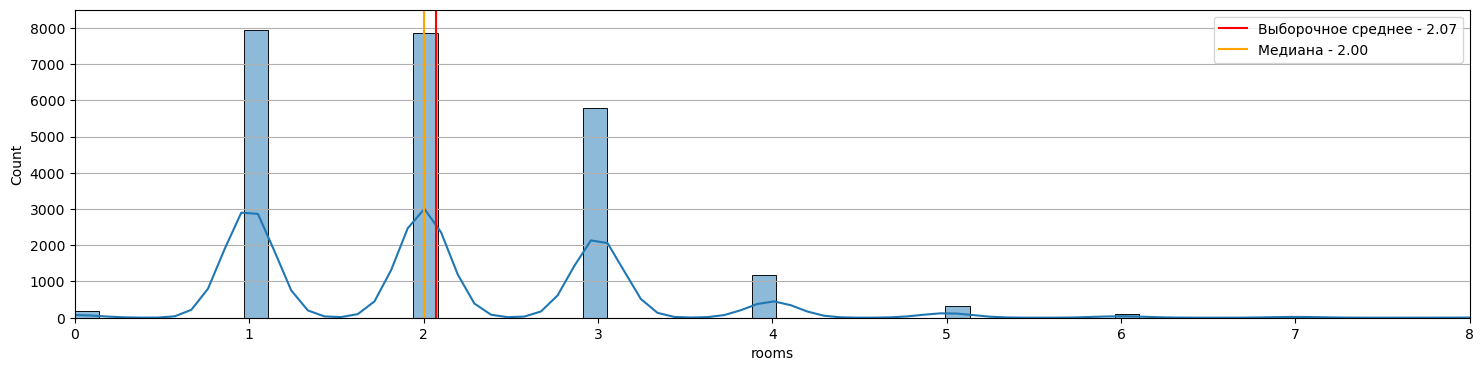

In [63]:
fig, ax = plt.subplots(figsize=(18,4))
ax = sns.histplot(df.rooms, kde=True)
ax.grid (axis='y')

plt.xlim(0, 8)
plt.ylim(0, 8500)

ax.axvline(df.rooms.mean(), color='red', label=f'Выборочное среднее - {df.rooms.mean():.2f}')
ax.axvline(df.rooms.median(), color='orange', label=f'Медиана - {df.rooms.median():.2f}')

plt.legend()

Количество комнат колеблется от 1 до 19. Больше всего 1-о и 2-х комнатных квартир. Свыше 6 комнат встречают очень редкие варианты квартиры. 

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


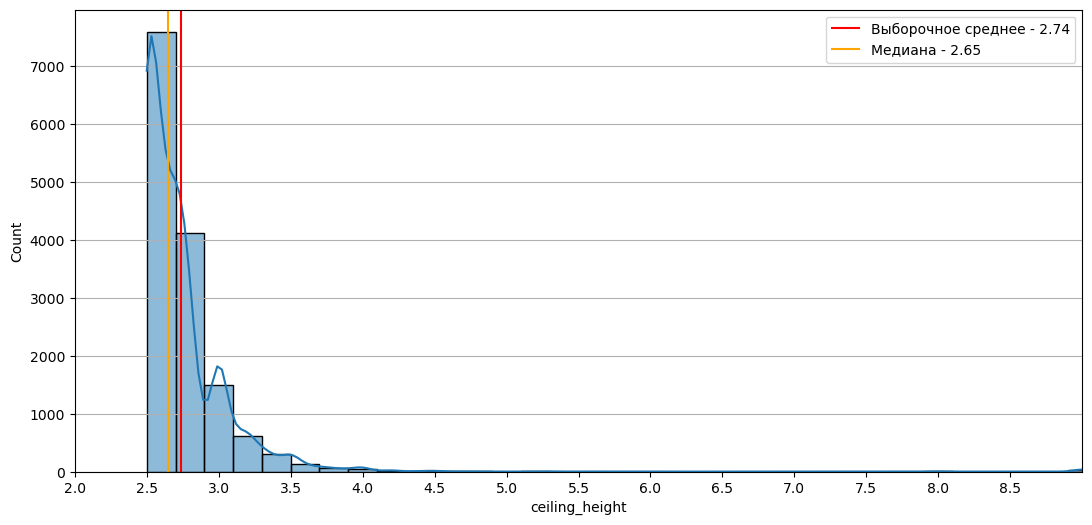

In [65]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.histplot(df.ceiling_height, kde=True, binwidth=0.2)
ax.grid (axis='y')
plt.xlim(2, 9)
plt.xticks(np.arange(2, 9, 0.5))

ax.axvline(df.ceiling_height.mean(), color='red', label=f'Выборочное среднее - {df.ceiling_height.mean():.2f}')
ax.axvline(df.ceiling_height.median(), color='orange', label=f'Медиана - {df.ceiling_height.median():.2f}')

plt.legend()


Чаще всего в квартира встречаются стандартные потолки от 2,5 до 3,2 метров. Свыше 3,5 метров потолки встречаются довольно редко.

In [67]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,20338.000000
mean,181.109893
std,220.061815
min,1.000000
25%,45.000000
50%,96.000000
75%,232.000000
max,1580.000000


In [68]:
df['days_exposition'].median()

96.0

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


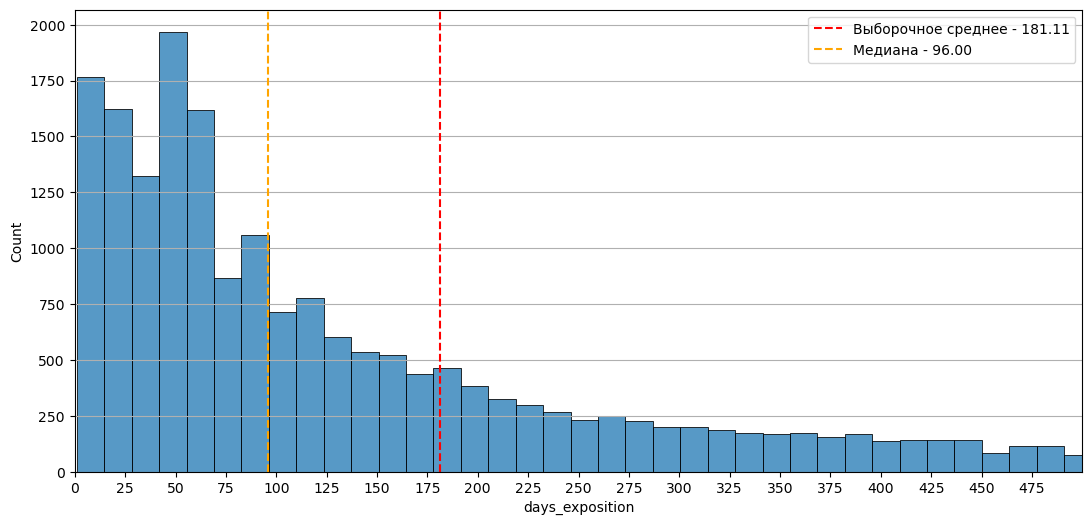

In [69]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.histplot(df.days_exposition)
ax.grid (axis='y')

plt.xlim(0, 500)
plt.xticks(np.arange(0, 500, 25))

ax.axvline(df.days_exposition.mean(), color='red', linestyle = '--', label=f'Выборочное среднее - {df.days_exposition.mean():.2f}')
ax.axvline(df.days_exposition.median(), color='orange', linestyle = '--', label=f'Медиана - {df.days_exposition.median():.2f}')

plt.legend()

В среднем квартиры продаются не дольше 100 дней. Расмотрим более подробно выборку продаж квартир в период 100 дней.

D:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


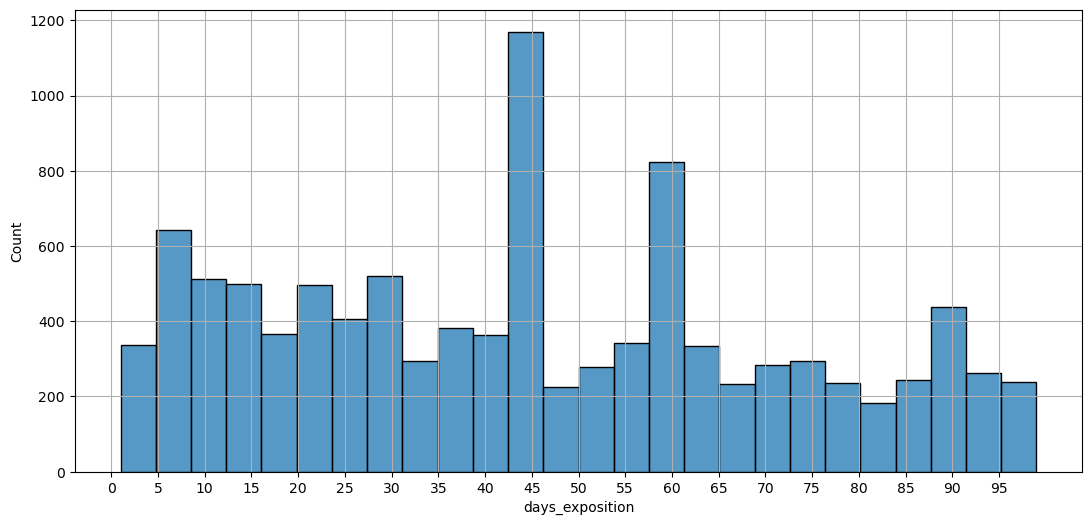

In [71]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.histplot(df.query('0<days_exposition<100')['days_exposition'])
plt.xticks(np.arange(0, 100, 5.0))

plt.grid()

Больше всего квартир продается в срок - 45 дней и 60 дней. Есть предположение, что сайт автомотически в этот период снимает объявление с продажи или звонит собственникам уточнить данный вопрос, а сами собственники не закрывают вовремя объявления.

Изучим зависимости цены от площади, числа комнат, удалённости от центра, на каком этаже расположена квартира: первом, последнем или другом, от даты размещения: дня недели, месяца и года.


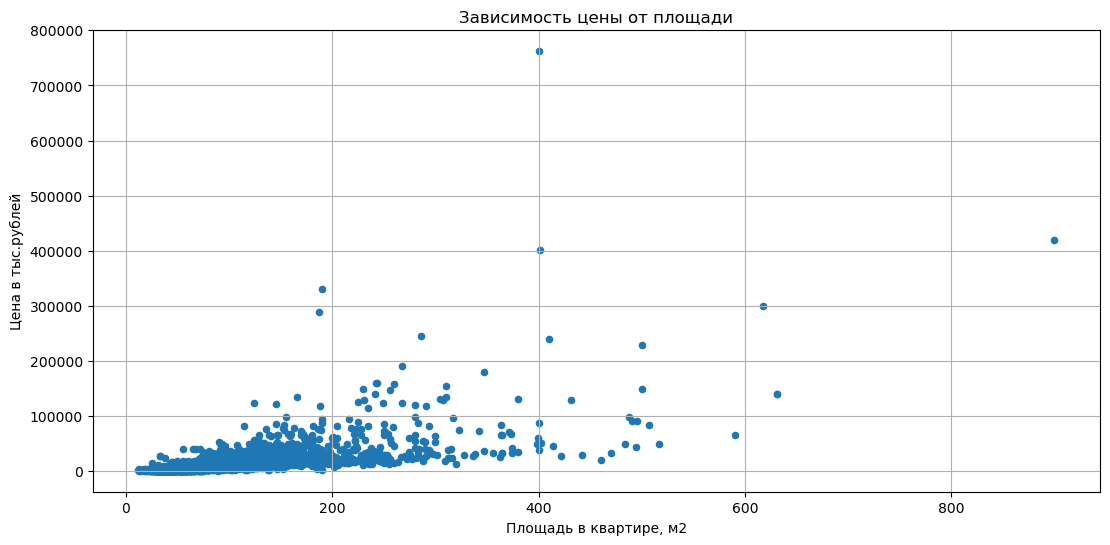

In [74]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(13,6))

plt.title('Зависимость цены от площади')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Площадь в квартире, м2')

plt.grid()

Рассмотрим данный график в диапозоне до 10 млн рублей за квартиру и до 500м2.

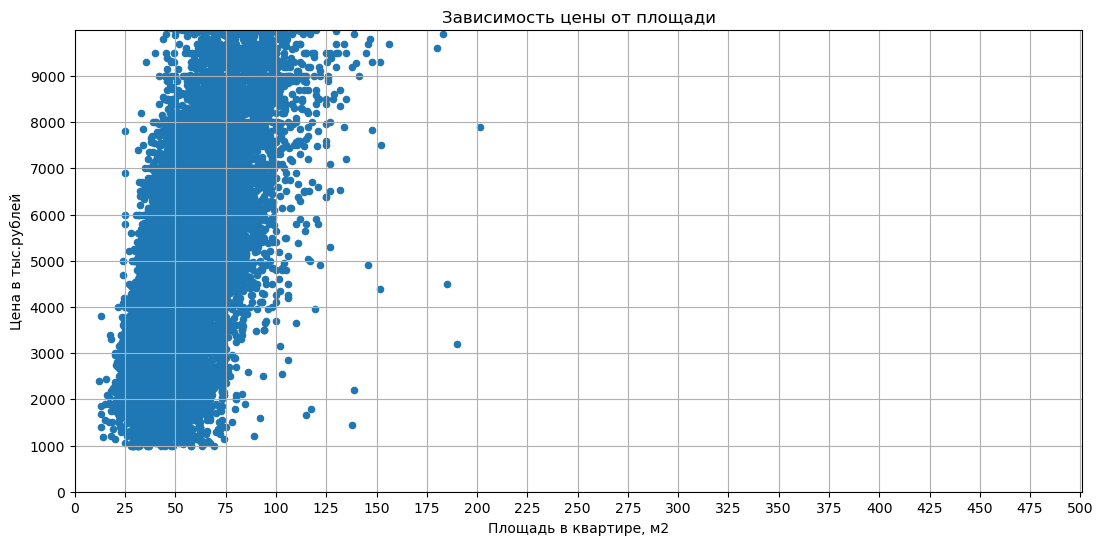

In [76]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(13,6))

plt.title('Зависимость цены от площади')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Площадь в квартире, м2')

plt.ylim(0,10_000)
plt.yticks(range(0, 10_000, 1_000))
plt.xlim(0, 501)
plt.xticks(range(0, 501, 25))

plt.grid()

Можно наблюдать слабый рост цен с ростом площадью квартиры. Скорее цены больше зависят от состояния продаваемого жилья.

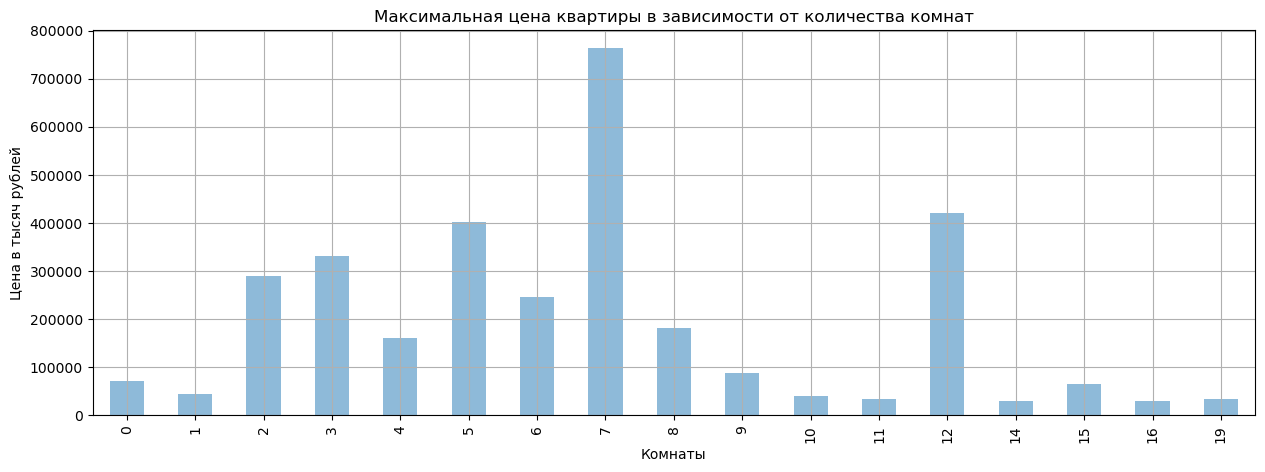

In [78]:
df.pivot_table(index='rooms', 
                 values='last_price', 
                 aggfunc='max').plot(y='last_price', 
                                     kind='bar', 
                                     figsize=(15, 5), 
                                     title='Максимальная цена квартиры в зависимости от количества комнат', 
                                     grid=True, legend=False, alpha=0.5)
plt.ylabel('Цена в тысяч рублей')
plt.xlabel('Комнаты')
plt.show()

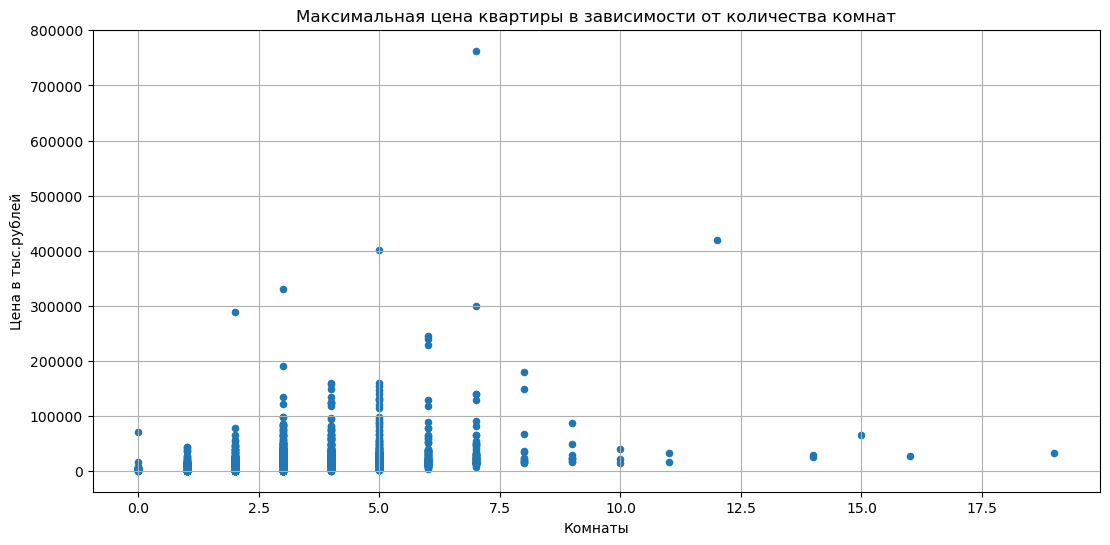

In [79]:
df.plot(x='rooms', y='last_price', kind='scatter', figsize=(13,6))
plt.title('Максимальная цена квартиры в зависимости от количества комнат')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Комнаты')

plt.xticks(range(0, 20, 1))

plt.grid()

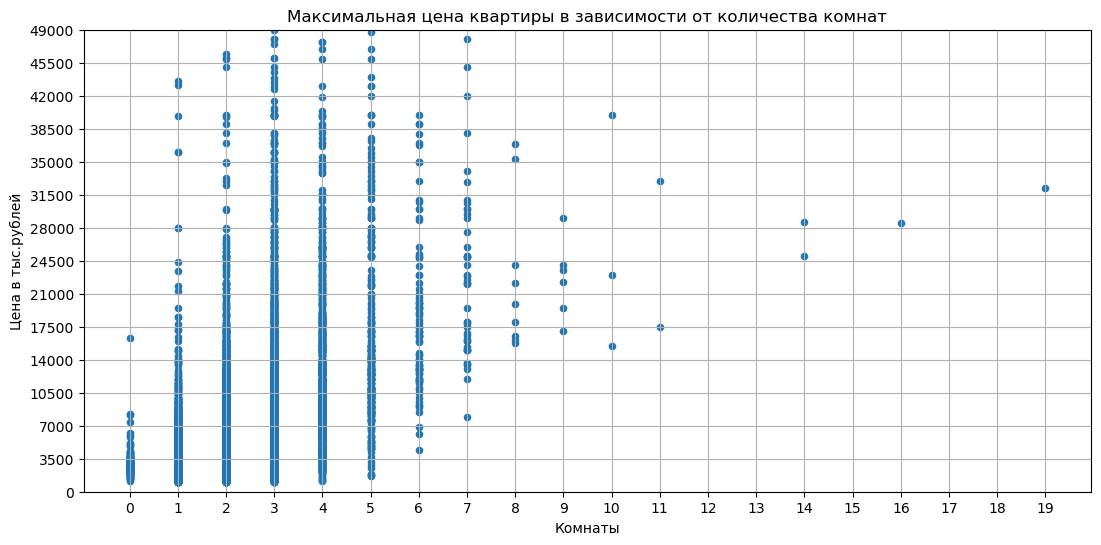

In [80]:
df.plot(x='rooms', y='last_price', kind='scatter', figsize=(13,6))
plt.title('Максимальная цена квартиры в зависимости от количества комнат')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Комнаты')

plt.xticks(range(0, 20, 1))
plt.ylim(0,20_000)
plt.yticks(range(0, 50_000, 3_500))

plt.grid()

Количество комнат может влияет на цену квартиры, самые дешевые являются студии. Далее от 1 до 5 комнат квартиры можно найти в одином ценовом диапозоне

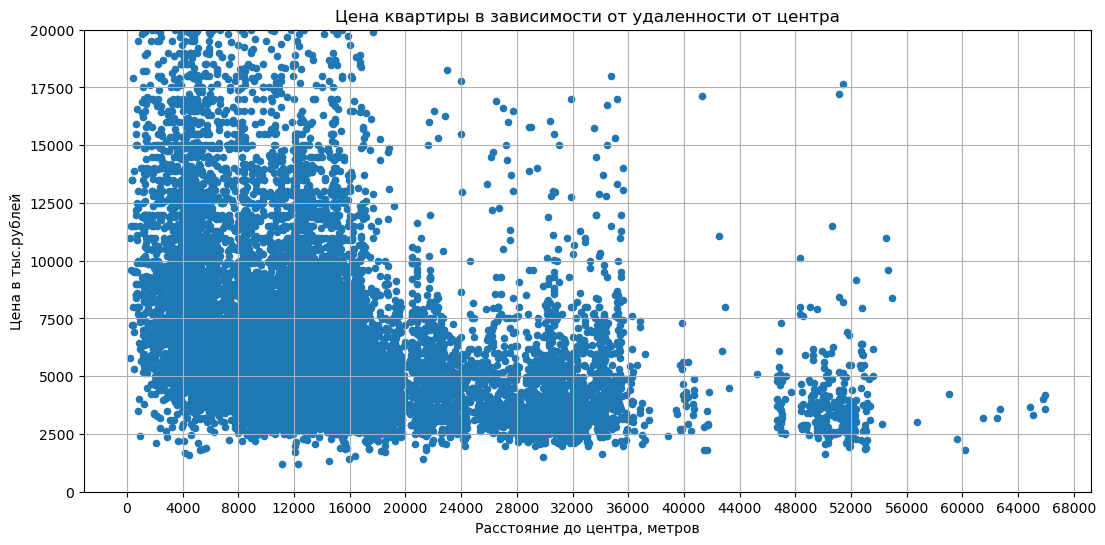

In [82]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(13,6))
plt.title('Цена квартиры в зависимости от удаленности от центра')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Расстояние до центра, метров')

plt.xticks(range(0, 70_000, 4_000))
plt.ylim(0, 20_000)
plt.grid()

Растоянние сильно зависит на стоимость квартир, чем ближе к центру, тем выше цена

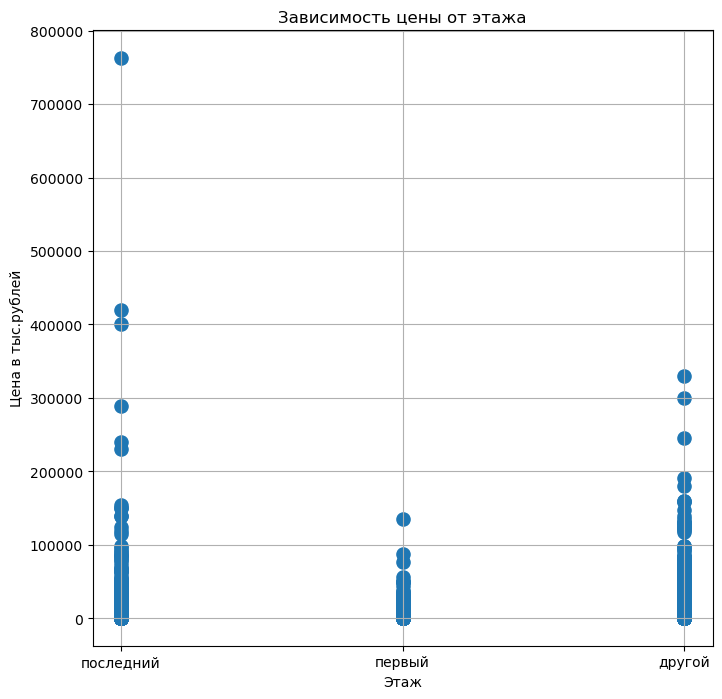

In [84]:
df.plot(x='level',  y='last_price', kind='scatter', s=90, figsize=(8,8))

plt.gca().invert_xaxis ()

plt.title('Зависимость цены от этажа')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Этаж')

plt.grid()

На первом этаже квартиры дешевле, на последнем этаже квартиры чуть дешевле, чем на других, но разница небольшая. Пару квартир которые дороже всего и находятся на последнем этаже являются аномалиями и скорее всего их повышенная цена не связана с последним этажом.

In [86]:
publish_day_percent = (df['day'].value_counts() / len(df)) * 100
publish_day_table = pd.DataFrame({'День недели': publish_day_percent.index, 'Процент': publish_day_percent.values})

publish_day_table

,День недели,Процент
0,3,18.143478
1,1,17.679134
2,4,16.886768
3,2,16.754707
4,0,15.267956
5,5,8.102582
6,6,7.165374


В среднем в четверг размещалось больше всего объявлений 18.15 % от общего, на втором месте вторник — 17.68 %. Остальные значения имеют небольшое отличие в 1-2% от максимальных, кроме выходных, В субботу и воскресенье размещалось примерно в два раза меньше объявлений, чем в другие дни.
Возможно это связано с работой риелтора, которые работают 5-ти дневную неделю.


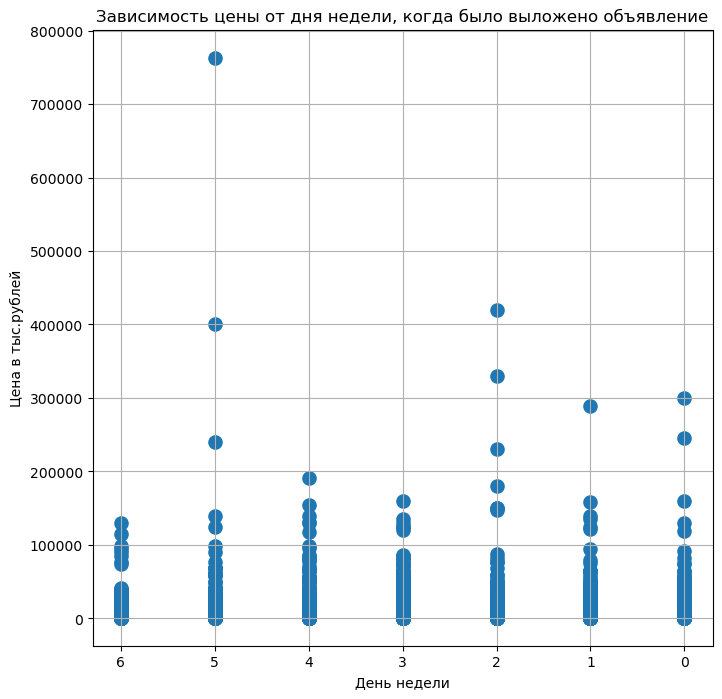

In [88]:
df.plot(x='day',  y='last_price', kind='scatter', s=90, figsize=(8,8))

plt.gca().invert_xaxis ()

plt.title('Зависимость цены от дня недели, когда было выложено объявление')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('День недели')

plt.grid()

In [89]:
publish_month_percent = (df['name_month'].value_counts() / len(df)) * 100
publish_month_table = pd.DataFrame({'Месяц': publish_month_percent.index, 'Процент': publish_month_percent.values})

publish_month_table

,Месяц,Процент
0,February,11.114424
1,March,10.914203
2,April,10.053676
3,November,10.019596
4,October,8.997188
5,September,8.353923
6,June,7.403936
7,August,7.374116
8,July,7.156854
9,December,6.931073


Чаще всего объявления выкладывают в феврале и марте, реже всего в мае и январе, декабре. В январе и мае больше всего праздников и выходных дней, люди часто уезжают и не занимаются продажей дома, а оставляют это на февраль. А в декабре люди заканчивают свои рабочие дела и готовятся к новому году в связи с чем начинается спад продаж.

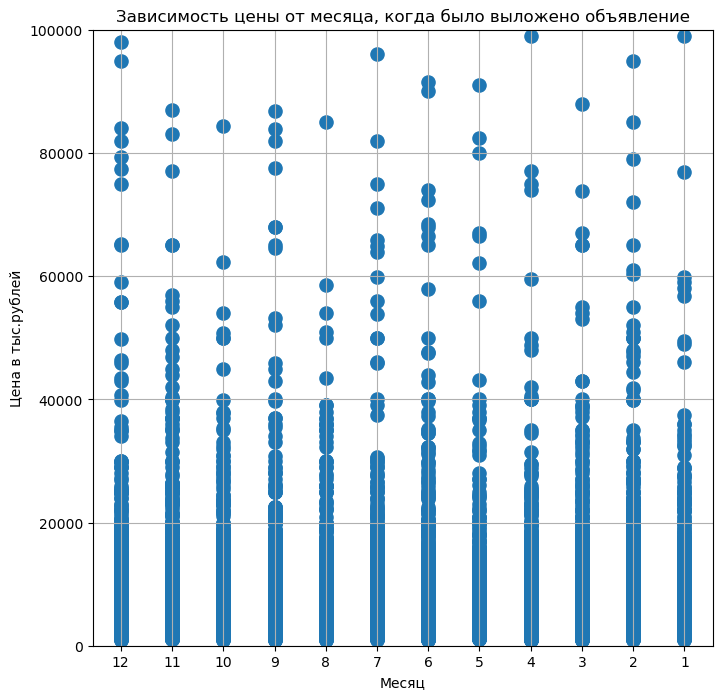

In [91]:
df.plot(x='number_month',  y='last_price', kind='scatter', s=90, figsize=(8,8))

plt.gca().invert_xaxis ()
plt.xticks(range(1, 13, 1))
plt.ylim(0,100_000)
plt.title('Зависимость цены от месяца, когда было выложено объявление')
plt.ylabel('Цена в тыс.рублей')
plt.xlabel('Месяц')

plt.grid()

In [92]:
publish_year_percent = (df['year'].value_counts() / len(df)) * 100
publish_year_table = pd.DataFrame({'Месяц': publish_year_percent.index, 'Процент': publish_year_percent.values})

publish_year_table

,Месяц,Процент
0,2018,35.831132
1,2017,34.655363
2,2019,12.136832
3,2016,11.744909
4,2015,5.048138
5,2014,0.583624


Данные за 2014 и 2019 год не полные, но несмотря на это в 2019 году было выложено 12,13% всех объявлений. Год с наибольшим количеством опубликованных объявлений - 2018 (35,83%).    
Рассмотрим выросла ли за года средняя стоимость жилья.

,mean,count,median
year,,,
2014,12087.135942,137,7700.0
2015,8612.159882,1185,5350.0
2019,6846.137943,2849,5100.0
2018,6017.512788,8411,4600.0
2016,6885.121740,2757,4550.0
2017,6624.922783,8135,4500.0


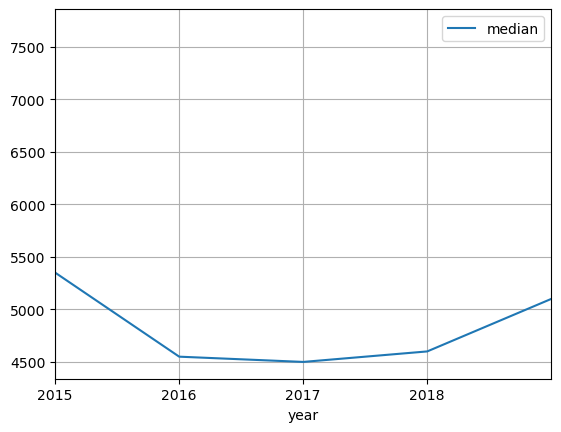

In [94]:
table_year_exposition = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
table_year_exposition.columns = ['mean', 'count', 'median']
table_year_exposition.plot(y = 'median')
plt.xlim(2015, 2019)
plt.xticks(range(2015,2019,1))   # данные за 2014 и 2019 не полные(не все месяца), поэтому мы их исключим из диапозона.
plt.grid()

table_year_exposition.sort_values('median', ascending = False)

С 2015 года средняя цена квартир упала, но с 2017 года начала заново расти.

In [96]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15720,8063.019175
посёлок Мурино,522,3672.049195
посёлок Шушары,440,4108.081816
Всеволожск,397,3796.179307
Пушкин,369,6469.035946
Колпино,338,3964.021438
посёлок Парголово,327,4488.074798
Гатчина,306,3496.958693
деревня Кудрово,299,4234.157926


In [97]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15720,8063.019175


In [98]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,233,3292.93133


Таким образом, на формирование цены существеннее всего влияют площадь и удаленность от центра.


Наиболее сильно на стоимость квартиры влияют следующие параметры: общая площадь, удаленность от центра.